### Import libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import feather
from os import listdir
from os.path import join, isfile
sns.set(style="whitegrid")
pd.options.mode.chained_assignment = None 

--------------------------------------

### Load correlation matrices

In [2]:
fileList = ['corrMats/' + f for f in listdir('corrMats/') if isfile(join('corrMats/', f))]
fileList

['corrMats/corrMat0.feather',
 'corrMats/corrMat1.feather',
 'corrMats/corrMat2.feather',
 'corrMats/corrMat3.feather',
 'corrMats/corrMat4.feather',
 'corrMats/corrMat5.feather',
 'corrMats/corrMat6.feather',
 'corrMats/corrMat7.feather',
 'corrMats/corrMat8.feather',
 'corrMats/corrMat9.feather']

--------------------------------------

In [3]:
df = feather.read_dataframe(fileList[7])
df

,method1,method2,feat1,feat2,corr
0,tsfel,tsfresh,tsfel_0_Absolute energy,tsfresh_value__abs_energy,1.000000
1,tsfel,tsfresh,tsfel_0_Absolute energy,tsfresh_value__absolute_sum_of_changes,0.247403
2,tsfel,tsfresh,tsfel_0_Absolute energy,"tsfresh_value__agg_autocorrelation__f_agg_""mea...",-0.048715
3,tsfel,tsfresh,tsfel_0_Absolute energy,"tsfresh_value__agg_autocorrelation__f_agg_""med...",-0.064469
4,tsfel,tsfresh,tsfel_0_Absolute energy,"tsfresh_value__agg_autocorrelation__f_agg_""var...",-0.086677
...,...,...,...,...,...
281227,tsfel,tsfresh,tsfel_0_Zero crossing rate,tsfresh_value__time_reversal_asymmetry_statist...,0.140248
281228,tsfel,tsfresh,tsfel_0_Zero crossing rate,tsfresh_value__value_count__value_1,0.027667
281229,tsfel,tsfresh,tsfel_0_Zero crossing rate,tsfresh_value__variance,0.425523
281230,tsfel,tsfresh,tsfel_0_Zero crossing rate,tsfresh_value__variance_larger_than_standard_d...,-0.067498


### Add title

In [4]:
def compute_max_corr(absMat, feat_i):
    
    # for each feature in the method, take the maximum correlation
    featList = absMat[feat_i].unique()
    maxList = []
    
    for feat in featList:
        
        maxList.append(absMat[absMat[feat_i] == feat]['corr'].max())
    
    return sorted(maxList, reverse=True), featList


def corr_for_each_feat(corrMat, first=False, second=False):
    
    # drop all rows with NaN value
    absMat = corrMat.dropna()
    absMat['corr'] = absMat['corr'].abs()
    
    if first:
        method1 = corrMat['method1'].unique()[0]
        method2 = corrMat['method2'].unique()[0]
        
        maxList, featList = compute_max_corr(absMat, 'feat1')
        data = {'method': [method1] * len(maxList), 'feat': featList, 'maxCorr': maxList}
        
    elif second:
        method2 = corrMat['method1'].unique()[0]
        method1 = corrMat['method2'].unique()[0]
        
        maxList, featList = compute_max_corr(absMat, 'feat2')
        l = len(featList)
        data = {'method1': [method1] * l, 'method2': [method2] * l, 'feat': featList, 'maxCorr': maxList}
        
    return pd.DataFrame.from_dict(data)
    
    
def plot_maxAbs(df, title=' '):
    
    method1 = df['method1'].unique()[0]
    method2 = df['method2'].unique()[0]
    
    y_pos = np.arange(len(df))
    
    # Create bars
    plt.bar(y_pos, df['maxCorr'], color='navy')
    
    # Create names on the x-axis
    if title != ' ':
        plt.xticks(y_pos, df['feat'].unique(),rotation='vertical')

    # Show graphic
    plt.xlabel(method1 + ' feature')
    plt.ylabel('Max. Abs. Correlation')
    # displaying the title
    plt.suptitle("Distribution of " + method1 + " max abs correlation by feature with " + method2)
    plt.title(title)
    plt.show()
    

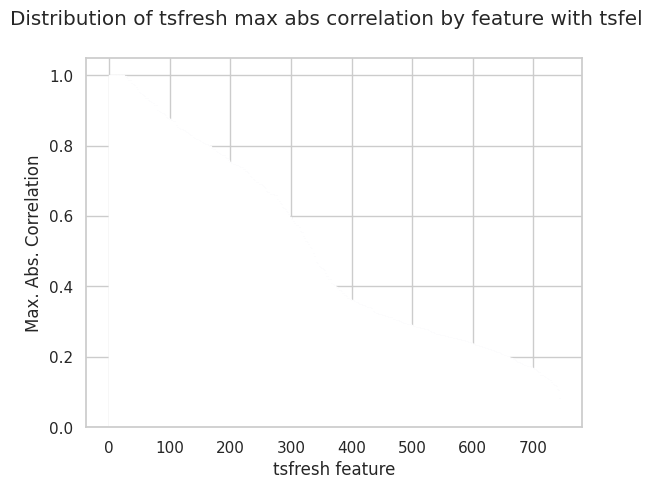

In [5]:
df = feather.read_dataframe(fileList[7])
a = corr_for_each_feat(df, second=True)
plot_maxAbs(a)

In [6]:
b = a.drop(a[a.maxCorr >= 0.2].index)
b

,method1,method2,feat,maxCorr
662,tsfresh,tsfel,"tsfresh_value__linear_trend__attr_""intercept""",0.196929
663,tsfresh,tsfel,"tsfresh_value__linear_trend__attr_""pvalue""",0.196474
664,tsfresh,tsfel,"tsfresh_value__linear_trend__attr_""rvalue""",0.196148
665,tsfresh,tsfel,"tsfresh_value__linear_trend__attr_""slope""",0.195986
666,tsfresh,tsfel,"tsfresh_value__linear_trend__attr_""stderr""",0.195943
...,...,...,...,...
739,tsfresh,tsfel,tsfresh_value__time_reversal_asymmetry_statist...,0.114827
740,tsfresh,tsfel,tsfresh_value__value_count__value_1,0.109959
741,tsfresh,tsfel,tsfresh_value__variance,0.106238
742,tsfresh,tsfel,tsfresh_value__variance_larger_than_standard_d...,0.092570


In [7]:
for i in b['feat'].unique():
    print(i)

tsfresh_value__linear_trend__attr_"intercept"
tsfresh_value__linear_trend__attr_"pvalue"
tsfresh_value__linear_trend__attr_"rvalue"
tsfresh_value__linear_trend__attr_"slope"
tsfresh_value__linear_trend__attr_"stderr"
tsfresh_value__longest_strike_above_mean
tsfresh_value__longest_strike_below_mean
tsfresh_value__max_langevin_fixed_point__m_3__r_30
tsfresh_value__maximum
tsfresh_value__mean
tsfresh_value__mean_abs_change
tsfresh_value__mean_change
tsfresh_value__mean_second_derivative_central
tsfresh_value__median
tsfresh_value__minimum
tsfresh_value__number_crossing_m__m_-1
tsfresh_value__number_crossing_m__m_0
tsfresh_value__number_crossing_m__m_1
tsfresh_value__number_cwt_peaks__n_1
tsfresh_value__number_cwt_peaks__n_5
tsfresh_value__number_peaks__n_1
tsfresh_value__number_peaks__n_10
tsfresh_value__number_peaks__n_3
tsfresh_value__number_peaks__n_5
tsfresh_value__number_peaks__n_50
tsfresh_value__partial_autocorrelation__lag_1
tsfresh_value__partial_autocorrelation__lag_2
tsfresh_va

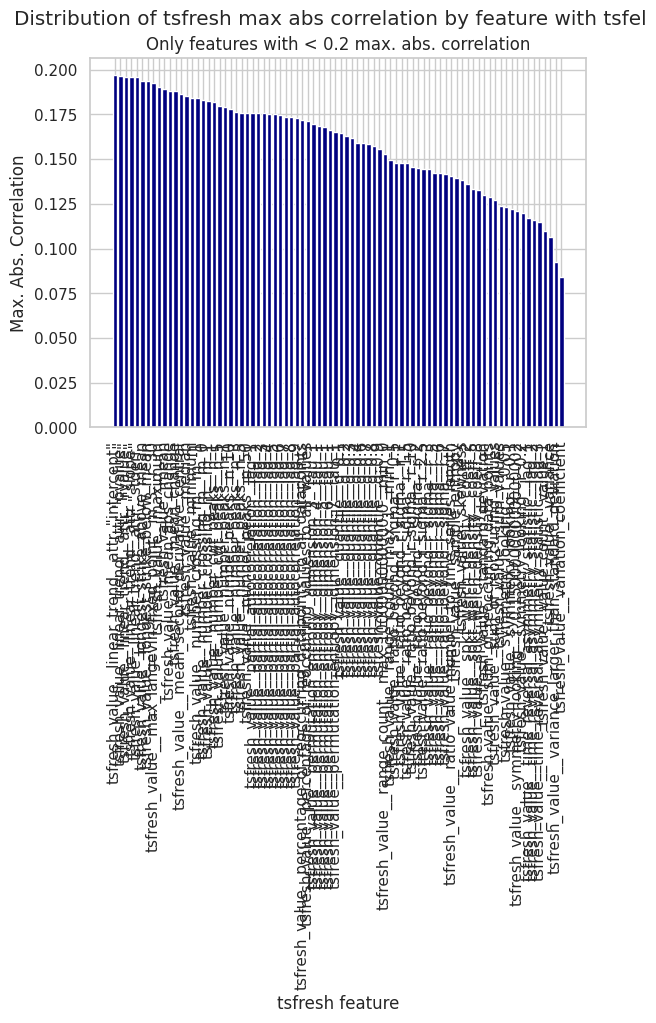

In [14]:
b = a.drop(a[a.maxCorr >= 0.2].index)
plot_maxAbs(b, "Only features with < 0.2 max. abs. correlation")

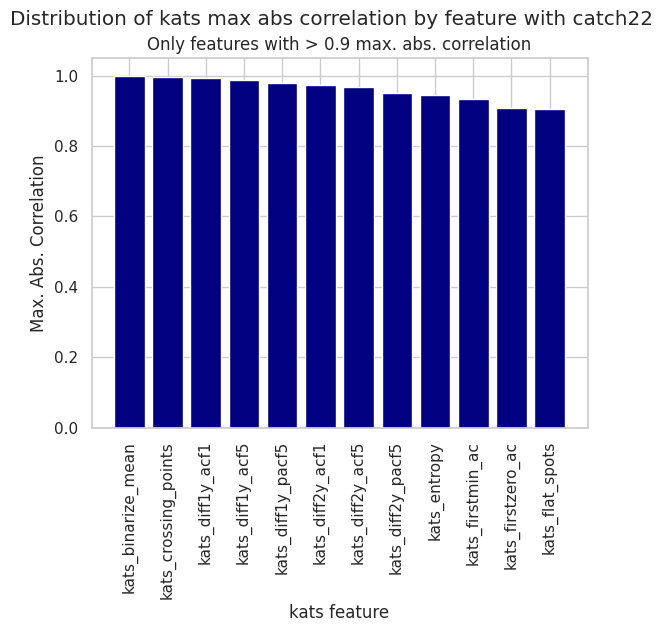

In [33]:
c = a.drop(a[a.maxCorr <= 0.9].index)
plot_maxAbs(c, "Only features with > 0.9 max. abs. correlation")

--------------------------------------